In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [33]:
def plot_freq_bar(x, y, title, scale='linear', figsize=(10, 5), rotation=True, xlabel='', ylabel=''):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.barplot(x=x, y=y, ax=ax)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    if rotation:
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.yscale(scale)

    plt.grid()

In [3]:
def scatter(x, y, title, scale='linear', figsize=(10, 5), xlabel='', ylabel=''):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.scatterplot(x=x, y=y)
    plt.yscale(scale)
    plt.grid()

def scatter_3d(x, y, z, title, scale='linear', figsize=(10, 5), xlabel='', ylabel='', zlabel=''):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    ax.scatter(x, y, z)

    plt.show()

In [50]:
def plot_pie(sizes, labels, title, floating_points=2):
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    ax1.pie(sizes, labels=labels, autopct=f'%1.{floating_points}f%%',
            shadow=True, startangle=90, explode=[0.05]*len(labels))
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title, pad=50)
    plt.show()

In [7]:
def get_timestamp(date_column):
    time_stamp = pd.to_datetime(date_column)
    df = pd.DataFrame()
    df['Year'] = time_stamp.apply(lambda time: time.year)
    df['Day'] = time_stamp.apply(lambda time: time.day)
    df['Month'] = time_stamp.apply(lambda time: time.month)
    df['Day of week'] = time_stamp.apply(lambda time: time.dayofweek)
    dmap = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri",5: "Sat", 6: "Sun"}
    df['Day of week'] = df['Day of week'].map(dmap)
    return df

In [2]:
def plot_map(x, y):
    geometry = [Point(xy) for xy in zip(x, y)]
    gdf = GeoDataFrame(geometry=geometry)   
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(20, 12)), marker='+', color='red', markersize=40)

In [6]:
dates = []
users = []
ratings = []
hotel_urls = []

In [7]:
reader = pd.read_json("F:\HotelRec.txt", lines=True, chunksize=2* 10**5)

In [8]:
def read_data(limit = 5 * 10**6):
    for idx, df_chunk in enumerate(reader):
        dates.extend(df_chunk['date'])
        users.extend(df_chunk['author'])
        ratings.extend(df_chunk['rating'])
        hotel_urls.extend(df_chunk['hotel_url'])
        print('*', end='')
        if idx * 2 * 10**5 > limit:
            break


In [ ]:
# readData(23 * 10**6)

In [2]:
# df = pd.DataFrame(zip(users, dates, ratings, hotel_urls), columns=['users', 'dates', 'ratings', 'hotel_url'])
dates_df = pd.read_csv("F:\HotelRecDates.csv")
users_df = pd.read_csv("F:\HotelRecSlice.csv")
hotels_df = pd.read_csv("F:\HotelRecUsers.csv")

In [5]:
df = pd.merge(users_df, dates_df)
df = pd.merge(df, hotels_df)

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,ratings,hotel_url,dates,users
0,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2019-01-01 00:00:00,violettaf340
1,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2016-01-01 00:00:00,Lagaiuzza
2,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2014-10-01 00:00:00,ashleyn763
3,5,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2014-08-01 00:00:00,DavideMauro
4,4,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2013-08-01 00:00:00,Alemma11


In [12]:
df = df.reindex(columns=['users', 'dates', 'ratings', 'hotel_url'])

In [13]:
df.to_csv('HotelRecSlice.csv')

In [4]:
df = pd.read_csv("F:\DataSets\\HotelRecSlice.csv")

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
timestamp_df = get_timestamp(df['dates'])

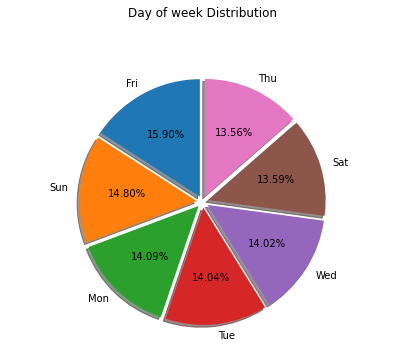

In [51]:
plot_pie(sizes=timestamp_df['Day of week'].value_counts(), 
         labels=timestamp_df['Day of week'].value_counts().index, title='Day of week Distribution')

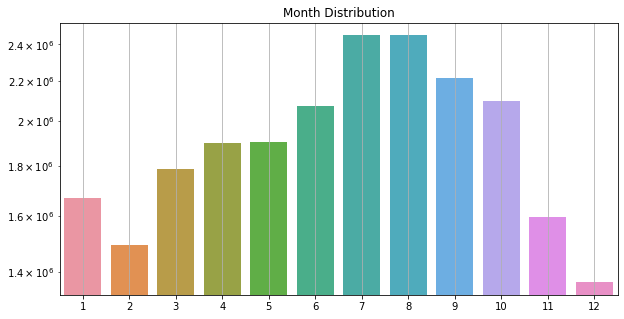

In [46]:
plot_freq_bar(x=timestamp_df['Month'].value_counts().index, y=timestamp_df['Month'].value_counts(), 
             title='Month Distribution', scale='log', rotation=False)

In [52]:
years = timestamp_df['Year'].unique()
years.sort()
years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [53]:
df['users'].describe()

count       22989118
unique      12452308
top       /undefined
freq          595157
Name: users, dtype: object

In [54]:
df['ratings'].describe()

count    2.300000e+07
mean     4.156585e+00
std      1.123922e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

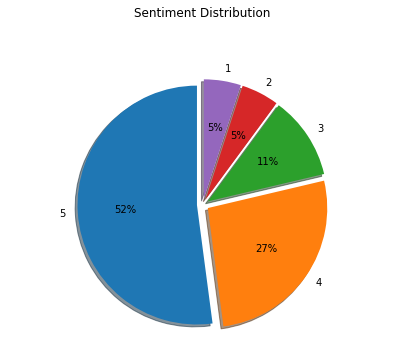

In [55]:
plot_pie(sizes=df['ratings'].value_counts(), labels=df['ratings'].value_counts().index, 
         title='Sentiment Distribution', floating_points=0)

In [56]:
users_reviews = df.groupby('users').count()

In [57]:
users_reviews.describe()

,dates,ratings,hotel_url
count,1.245231e+07,1.245231e+07,1.245231e+07
mean,1.846173e+00,1.846173e+00,1.846173e+00
std,1.686744e+02,1.686744e+02,1.686744e+02
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00
max,5.951570e+05,5.951570e+05,5.951570e+05


In [58]:
users_reviews[users_reviews['dates'] == users_reviews.max()['dates']]

,dates,ratings,hotel_url
users,,,
/undefined,595157,595157,595157


In [59]:
df.drop(df[df['users'] == '/undefined'].index, inplace=True)

In [60]:
users_reviews = df.groupby('users').count()

In [61]:
users_reviews = users_reviews['dates']

In [62]:
users_reviews.describe()

count    1.245231e+07
mean     1.798378e+00
std      2.397056e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.600000e+02
Name: dates, dtype: float64

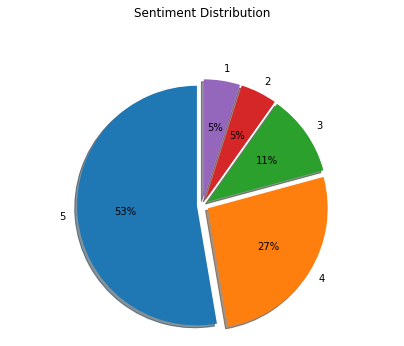

In [63]:
plot_pie(sizes=df['ratings'].value_counts(), labels=df['ratings'].value_counts().index, 
         title='Sentiment Distribution', floating_points=0)

In [64]:
hotels_reviews = df.groupby('hotel_url').count()['dates']

In [65]:
hotels_reviews.describe()

count    111093.000000
mean        201.676460
std         314.706276
min           1.000000
25%          62.000000
50%         138.000000
75%         250.000000
max       10191.000000
Name: dates, dtype: float64

In [146]:
df = pd.read_csv("F:\DataSets\Hotels_features_dataset.csv")

In [147]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [148]:
df.head()

,name,country,street,region,rating,reviews,amenities,rooms,types,price,official_description
0,WH Hotel,Lebanon,Lyon Street Hamra Emille Edde,NaN,4.0,"{'Excellent': 104, 'Good': 102, 'Average': 51,...","Free High Speed Internet (WiFi),Free breakfast...","Air conditioning,Fireplace,Housekeeping,Room s...","Non-smoking rooms,Suites,Family rooms,Smoking ...",NaN,NaN
1,Le Patio Boutique Hotel,Lebanon,"1144 Marfaa, Uruguay Street Solidere",NaN,4.5,"{'Excellent': 213, 'Good': 78, 'Average': 31, ...","Paid private parking nearby,Free High Speed In...","Air conditioning,Housekeeping,Room service,Saf...","Non-smoking rooms,Suites,Family rooms,Smoking ...",121.0,NaN
2,Riviera Hotel Beirut,Lebanon,"Avenue De Paris, Corniche El Manara Riad El Solh",NaN,3.5,"{'Excellent': 90, 'Good': 101, 'Average': 69, ...","Valet parking,Free High Speed Internet (WiFi),...","Air conditioning,Private balcony,Room service,...","Ocean view,Pool view,Non-smoking rooms,Suites,...",NaN,NaN
3,Le Bristol Beyrouth,Lebanon,Mme Curie Street Verdun,NaN,4.5,"{'Excellent': 219, 'Good': 79, 'Average': 25, ...","Free High Speed Internet (WiFi),Pool,Fitness C...","Air conditioning,Room service,Safe,VIP room fa...","Non-smoking rooms,Suites,Family rooms,Smoking ...",NaN,NaN
4,Golden Tulip Midtown Hotel And Suites,Lebanon,"Building Number 483, Sidani / Souraty Street M...",NaN,4.0,"{'Excellent': 147, 'Good': 86, 'Average': 32, ...","Free parking,Free High Speed Internet (WiFi),P...","Air conditioning,Room service,Safe,Kitchenette...","Non-smoking rooms,Suites,Family rooms,Smoking ...",NaN,NaN


In [75]:
from collections import Counter

most_common_counter = Counter(df['country'])

most_common = most_common_counter.most_common(20)

most_common_countries = [country for country, _ in most_common]
most_common_countries_counts = [count for _, count in most_common]

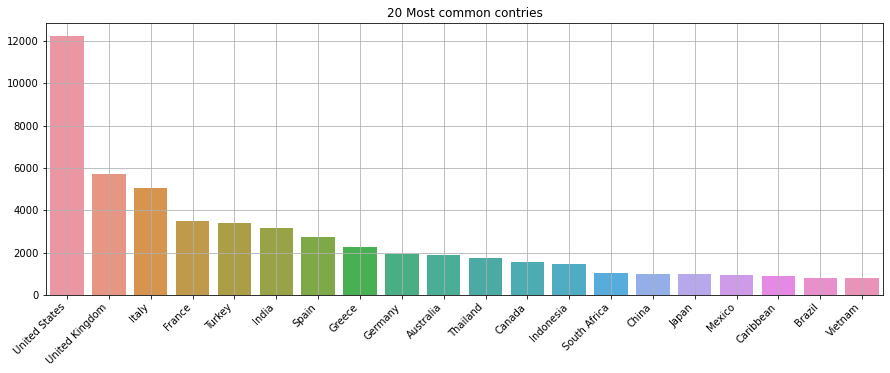

In [78]:
plot_freq_bar(most_common_countries, most_common_countries_counts, '20 Most common contries', figsize=(15, 5))

In [79]:
df['rating'].describe()

count    70107.000000
mean         4.072967
std          0.695431
min          0.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

In [19]:
places_df = pd.read_csv('/Users/osamaalhalabi/Desktop/trips-planning-system/dataset/places_dataset.csv')

In [5]:
x = []
y = []
for row in places_df.coordinates:
    lat = list(eval(row))[0]
    lon = list(eval(row))[1]
    if lon < 90 and lon > -50:
        x.append(int(lat))
        y.append(int(lon))

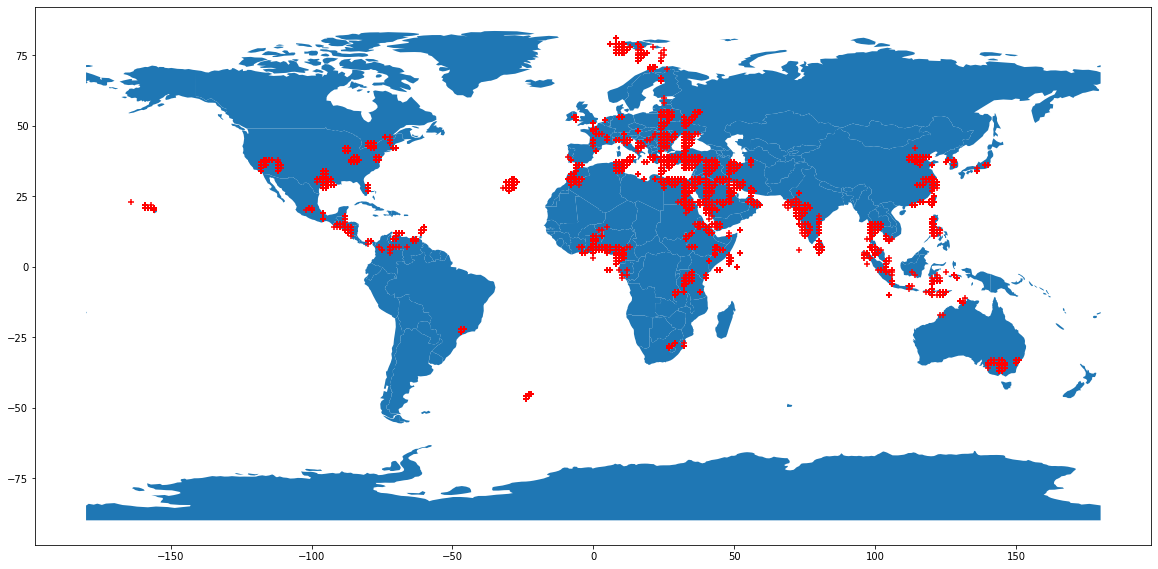

In [6]:
plot_map(x, y)

In [85]:
features_series = df['amenities']
indices = [idx for idx, item in enumerate(features_series) if not isinstance(item, str)]
features_series.drop(indices, inplace=True)

In [86]:
features = set()
features_series.apply(lambda item: [features.add(x) for x in str(item).split(',')])
len(features)

479

In [157]:
amenities  = df['amenities'] + ',' +  df['rooms']
col_names = features_df.columns
def extract_features(amenities,features):
    hotel_features = []
    col_names = pd.Index(features)
    for i,amenity in enumerate(amenities):
        feats = amenity.split(',')
        row = np.zeros(len(features))
        for feat in feats:
            if feat != '':
                index = np.where(col_names == feat)[0][0] #index
                row[index] = 1
        hotel_features.append(row)
    return hotel_features

In [158]:
df.drop(df[df['amenities'].isna() & df['rooms'].isna()].index, inplace=True)
df['rooms'].fillna('', inplace=True)
df['amenities'].fillna('', inplace=True)

In [159]:
features_array = extract_features(amenities, features)
features_df = pd.DataFrame(features_array,columns= features)

In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features_df['country'] = le.fit_transform(df['country'])

In [161]:
missing_region = df[df['region'].isna()]

In [162]:
missing_region.shape

(14220, 11)

In [163]:
import re
small_features_df = features_df.drop([v for v in features_df.columns.values if re.search(r'amenity', v)], axis=1)
small_features_df.shape

(69919, 274)

In [164]:
columns = small_features_df.sum(axis=0).sort_values(ascending=False).index[:20]
columns = columns.drop('country')

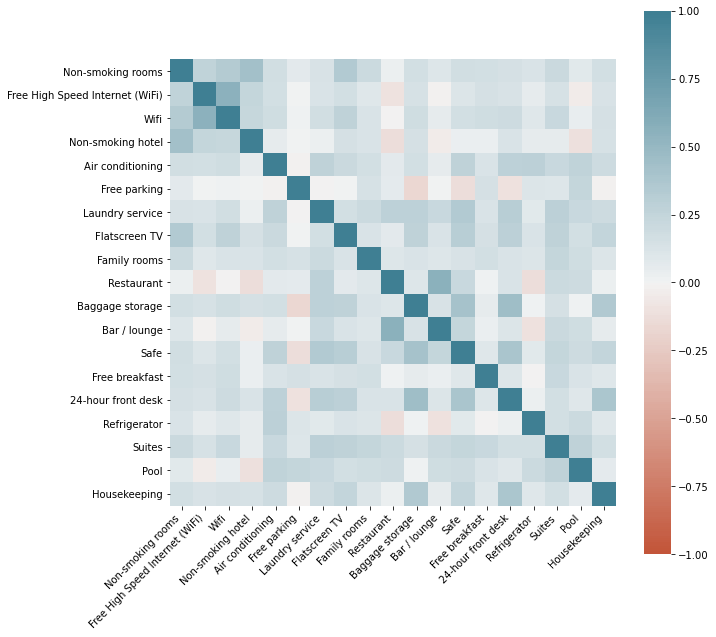

In [165]:
corr = small_features_df[columns].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr, 
    ax=ax,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

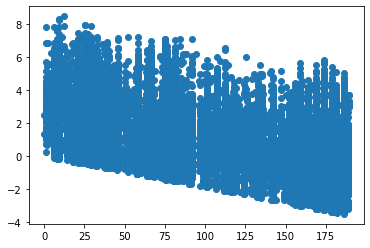

In [166]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=42)
res = svd.fit_transform(small_features_df.to_numpy())
plt.scatter(res[:,0],res[:,1])

# Conclusion
We can easily see that our hotels features are dense and too much overlaped, thus we need to put weights on the important features to the customer using topic modeling and re-evaluate our features.
We can add more features like the number of POI/Restaurants within half a mile around hotel location (get hotel location using geocoding).

In [168]:
reviews_df = pd.read_csv("D:\ProJects//5th Year\Hotel_Reviews.csv")

In [170]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [171]:
STOPWORDS = set(nltk.corpus.stopwords.words('english'))

In [176]:
positive_corpus = " ".join(reviews_df['Positive_Review'])
negative_corpus = " ".join(reviews_df['Negative_Review'])

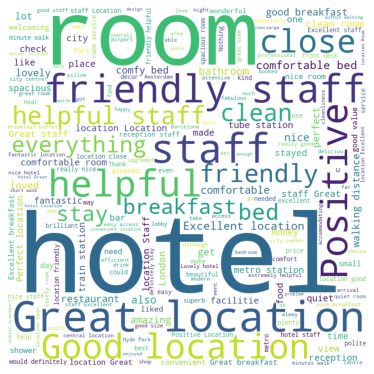

In [178]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10)

positive_cloud = wordcloud.generate(positive_corpus) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(positive_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

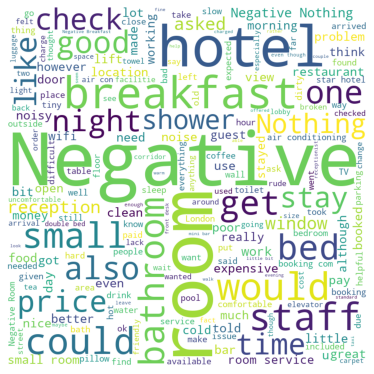

In [180]:
negative_cloud = wordcloud.generate(negative_corpus) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(negative_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(reviews_df['Positive_Review'])
tf_feature_names = tf_vectorizer.get_feature_names()

In [184]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10
# Run LDA
lda = LatentDirichletAllocation(no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [185]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [186]:
display_topics(lda, tf_feature_names, 10)

Topic 0:
positive facilities price superb quality brilliant professional gym property tourist
Topic 1:
bed comfy extremely pool service design room liked loved cleanliness
Topic 2:
hotel stay great best like place time definitely recommend stayed
Topic 3:
room free check coffee bar day wifi kind reception tea
Topic 4:
staff friendly helpful location excellent great hotel breakfast clean reception
Topic 5:
location close station hotel walk metro city central easy near
Topic 6:
location room clean nice great good rooms comfortable hotel modern
Topic 7:
good breakfast location food great restaurant parking choice buffet transport
Topic 8:
comfortable bed room beds shower pleasant small really comfort enjoyed
Topic 9:
staff room lovely bathroom amazing hotel big view wonderful nice


In [187]:
neg_tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
neg_tf = neg_tf_vectorizer.fit_transform(reviews_df['Negative_Review'])
neg_tf_feature_names = neg_tf_vectorizer.get_feature_names()
neg_lda = LatentDirichletAllocation(no_topics, max_iter=5, learning_method='online', 
                                    learning_offset=50.,random_state=0).fit(neg_tf)

In [188]:
display_topics(neg_lda, neg_tf_feature_names, 10)

Topic 0:
breakfast bar staff expensive service food area restaurant pool slow
Topic 1:
didn like parking door work tv bath did early car
Topic 2:
room small bed coffee rooms bit tea beds little facilities
Topic 3:
room water staff cold day hot bad open street rude
Topic 4:
hotel location far stay city money long bit walk 10
Topic 5:
room check hotel wifi staff booking reception told booked asked
Topic 6:
negative excellent cleanliness general wine super enjoy means closing beer
Topic 7:
room night noisy air noise hotel outside rooms problem sleep
Topic 8:
breakfast good poor price better quality high service used bit
Topic 9:
room bathroom shower small rooms hotel bed old star quite


In [48]:
df_google = pd.read_csv('/Users/osamaalhalabi/Desktop/Workstation/Trips-planning-dataset/google_review_ratings.csv')

In [49]:
df_google.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [28]:
categories = [
    'user id',
    'churches',
    'resorts',
    'beaches',
    'parks',
    'theatres',
    'museums',
    'malls',
    'zoo',
    'restaurants',
    'pubs/bars',
    'local services',
    'burger/pizza shops',
    'hotels/other lodgings',
    'juice bars',
    'art galleries',
    'dance clubs',
    'swimming pools',
    'gyms',
    'bakeries',
    'beauty & spas',
    'cafes',
    'view points',
    'monuments',
    'gardens',
    'other',
]

In [50]:
df_google.columns = categories

In [51]:
df_google.head()

,user id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,other
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [52]:
df = df_google.mean()

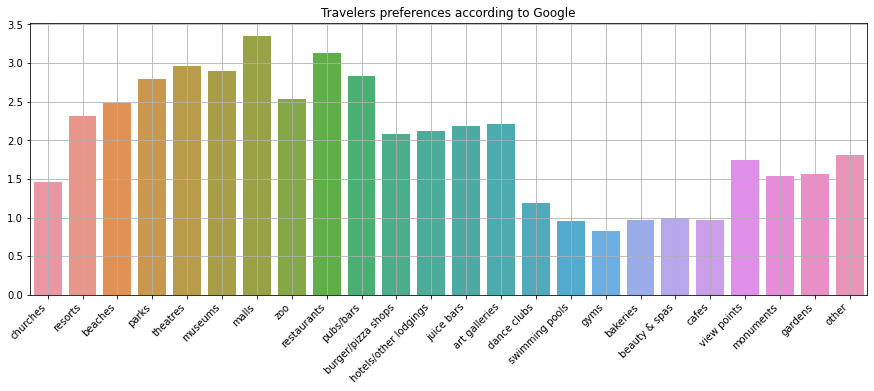

In [53]:
plot_freq_bar(df.index, df.values, 'Travelers preferences according to Google', figsize=(15, 5))